<a href="https://colab.research.google.com/github/Aerie55/lecture1/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


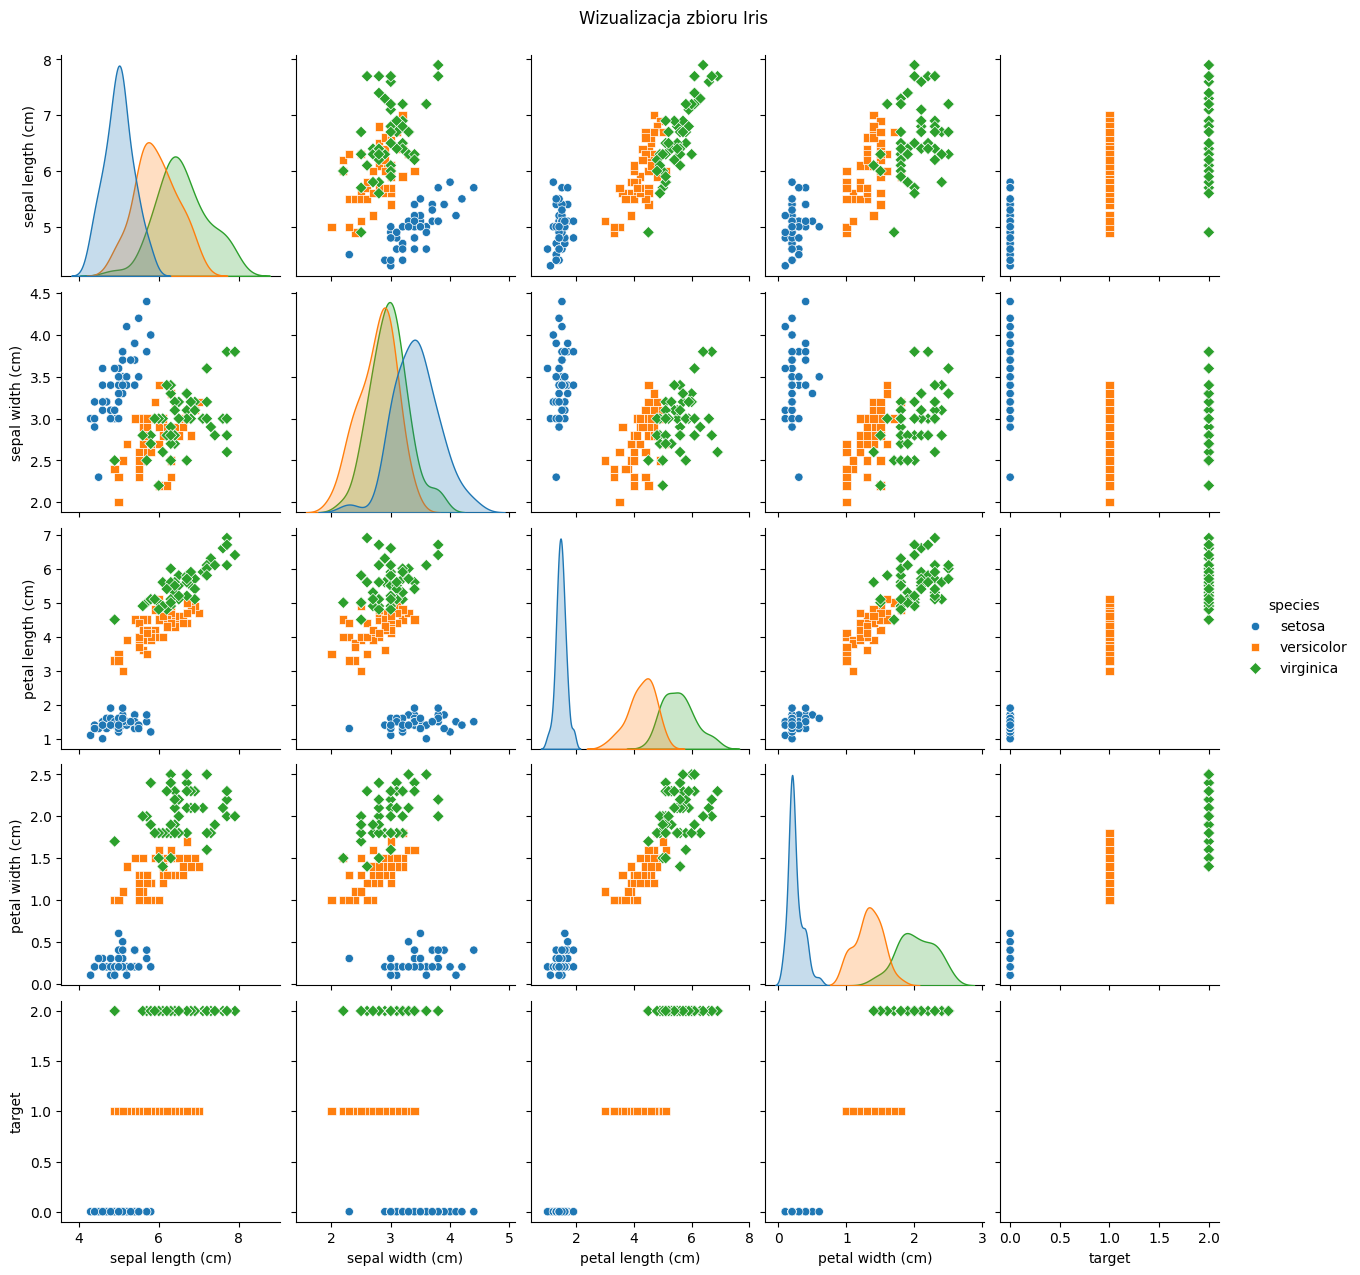

In [7]:

df['species'] = df['target'].map({i: name for i, name in enumerate(data.target_names)})


sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Wizualizacja zbioru Iris", y=1.02)
plt.show()

In [34]:
import numpy as np
from math import log2
from sklearn.datasets import load_iris


def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum([p * log2(p) for p in probs if p > 0])

def split_entropy(X, y, threshold):
    left_mask = X <= threshold
    right_mask = X > threshold
    y_left, y_right = y[left_mask], y[right_mask]

    ent_left = entropy(y_left)
    ent_right = entropy(y_right)

    w_left = len(y_left) / len(y)
    w_right = len(y_right) / len(y)

    total_entropy = w_left * ent_left + w_right * ent_right
    return total_entropy, ent_left, ent_right

iris = load_iris()
X = iris.data[:, 3]
y = iris.target


ent = entropy(y)
print(f"Entropia całego zbioru (przed podziałem): {ent:.4f}")

thresholds = [1.5, 0.38]

for threshold in thresholds:
    total_ent, ent_left, ent_right = split_entropy(X, y, threshold)
    print(f"Entropia po podziale dla progu {threshold}: {total_ent:.4f}")
    print(f"  Entropia lewej grupy: {ent_left:.4f}")
    print(f"  Entropia prawej grupy: {ent_right:.4f}")


Entropia całego zbioru (przed podziałem): 1.5850
Entropia po podziale dla progu 1.5: 0.9194
  Entropia lewej grupy: 1.1649
  Entropia prawej grupy: 0.4567
Entropia po podziale dla progu 0.38: 0.9654
  Entropia lewej grupy: -0.0000
  Entropia prawej grupy: 1.3286


In [35]:

def information_gain(X, y, threshold):
    left_mask = X <= threshold
    right_mask = X > threshold

    y_left, y_right = y[left_mask], y[right_mask]
    if len(y_left) == 0 or len(y_right) == 0:
        return 0

    ent_parent = entropy(y)
    ent_left = entropy(y_left)
    ent_right = entropy(y_right)

    w_left = len(y_left) / len(y)
    w_right = len(y_right) / len(y)

    gain = ent_parent - (w_left * ent_left + w_right * ent_right)
    return gain

In [38]:
X = data.data[:, 3]
y = data.target

gain_05 = information_gain(X, y, 1.5)
gain_038 = information_gain(X, y, 0.38)

print(f"Zysk informacyjny przy podziale 1.5: {gain_05:.4f}")
print(f"Zysk informacyjny przy podziale 0.38: {gain_038:.4f}")


Zysk informacyjny przy podziale 1.5: 0.6656
Zysk informacyjny przy podziale 0.38: 0.6195


In [41]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy')
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)

random_forest = RandomForestClassifier(n_estimators=15, random_state=42)
random_forest.fit(X_train, y_train)


y_pred_forest = random_forest.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

print(f"Dokładność drzewa decyzyjnego: {acc_tree:.4f}")
print(f"Dokładność lasu losowego (15 drzew): {acc_forest:.4f}")


Dokładność drzewa decyzyjnego: 0.9778
Dokładność lasu losowego (15 drzew): 1.0000
